### DAB422 : CAPSTONE PROJECT 2

## Project Title - Air Quality and Electric Vehicles: Analyzing Trends, Forecasting Air Quality Index, and Understanding Public Perception

- **Group Number: 5**

---
**Group Members**

 * Kabir Lawal 0832286

 * Olufunke Taiwo 0825559

 * Ofonime Inyang 0830724

 * Kehinde Felix 0848732

 * Labeebah Mustapha 0832584

## **Part A: Hypothesis Testing - Evaluating the Impact of Electric Vehicle Adoption on Air Quality Improvement**

### **Data Preprocessing and cleaning**
**1.1 Importing libraries**

In [404]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures,LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

**1.2 Importing the dataset**

In [405]:
df= pd.read_csv("capstone_dataset2.csv")
df.head()

,country_name,category,dat_parameter,mode,powertrain,year,unit,value,pm10_concentration,pm25_concentration,no2_concentration,AQI_PM10,AQI_PM25,AQI_NO2,Overall_AQI,AQI_Band
0,China,Historical,Electricity demand,Buses,EV,2018-01-01,GWh,15000.0,21.067455,50.152247,7.169824,19.506903,137.078398,6.763985,137.078398,Unhealthy for Sensitive Groups
1,China,Historical,Electricity demand,Trucks,EV,2018-01-02,GWh,5400.0,21.067455,50.152247,7.169824,19.506903,137.078398,6.763985,137.078398,Unhealthy for Sensitive Groups
2,China,Historical,Electricity demand,Vans,EV,2018-01-03,GWh,490.0,21.067455,50.152247,7.169824,19.506903,137.078398,6.763985,137.078398,Unhealthy for Sensitive Groups
3,China,Historical,Electricity demand,Cars,EV,2018-01-04,GWh,6200.0,21.067455,50.152247,7.169824,19.506903,137.078398,6.763985,137.078398,Unhealthy for Sensitive Groups
4,China,Historical,EV stock,Vans,PHEV,2018-01-05,Vehicles,17.0,21.067455,50.152247,7.169824,19.506903,137.078398,6.763985,137.078398,Unhealthy for Sensitive Groups


In [406]:
# Convert 'year' column from object to datetime
df['year'] = pd.to_datetime(df['year'], format='%Y-%m-%d', errors='coerce')

# Check the data type after conversion
print(df['year'].dtype)

# Verify the first few rows
print(df['year'].head())


datetime64[ns]
0   2018-01-01
1   2018-01-02
2   2018-01-03
3   2018-01-04
4   2018-01-05
Name: year, dtype: datetime64[ns]


In [407]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   country_name        1305 non-null   object        
 1   category            1305 non-null   object        
 2   dat_parameter       1305 non-null   object        
 3   mode                1305 non-null   object        
 4   powertrain          1305 non-null   object        
 5   year                1305 non-null   datetime64[ns]
 6   unit                1305 non-null   object        
 7   value               1305 non-null   float64       
 8   pm10_concentration  1305 non-null   float64       
 9   pm25_concentration  1305 non-null   float64       
 10  no2_concentration   1305 non-null   float64       
 11  AQI_PM10            1305 non-null   float64       
 12  AQI_PM25            1305 non-null   float64       
 13  AQI_NO2             1305 non-null   float64     

### 1. Formulate Hypotheses


- H0 (Null Hypothesis): EV adoption has no significant effect on long-term air quality improvement.
- H1 (Alternative Hypothesis): EV adoption leads to a significant improvement in long-term air quality.

### 1.1 : Data Preparation


In [467]:
# Convert 'year' column to datetime
df['year'] = pd.to_datetime(df['year'])

# Extract only the year part
df['year_only'] = df['year'].dt.year

# Define EV adoption period based on year
df['ev_adoption_period'] = df['year_only'].apply(lambda x: 'Post-EV Adoption' if x > 2020 else 'Pre-EV Adoption')

# Define baseline AQI for each country
baseline_aqi = {
    'China': 138.6,
    'Iceland': 27.7,
    'Norway': 30.8,
    'Sweden': 24.2,
    'United States of America': 33.3
}

# Map baseline AQI to the dataframe
df['baseline_AQI'] = df['country_name'].map(baseline_aqi)

# Display relevant columns
df[['country_name', 'year_only', 'ev_adoption_period', 'Overall_AQI', 'baseline_AQI']].head()


,country_name,year_only,ev_adoption_period,Overall_AQI,baseline_AQI
0,China,2018,Pre-EV Adoption,137.078398,138.6
1,China,2018,Pre-EV Adoption,137.078398,138.6
2,China,2018,Pre-EV Adoption,137.078398,138.6
3,China,2018,Pre-EV Adoption,137.078398,138.6
4,China,2018,Pre-EV Adoption,137.078398,138.6


### 1.2: Compare Pre- and Post-EV Adoption AQI

In [468]:
# Group data by country and adoption period, calculating the mean AQI
aqi_comparison = df.groupby(['country_name', 'ev_adoption_period'])['Overall_AQI'].mean().reset_index()

# Display the AQI comparison between pre- and post-EV adoption periods
aqi_comparison


,country_name,ev_adoption_period,Overall_AQI
0,China,Post-EV Adoption,106.025704
1,China,Pre-EV Adoption,128.316712
2,Iceland,Post-EV Adoption,11.000201
3,Iceland,Pre-EV Adoption,17.082986
4,Norway,Post-EV Adoption,17.610465
5,Norway,Pre-EV Adoption,24.023996
6,Sweden,Post-EV Adoption,7.226152
7,Sweden,Pre-EV Adoption,9.552900
8,United States of America,Post-EV Adoption,28.010085
9,United States of America,Pre-EV Adoption,28.695766


### 1.3 : Hypothesis Testing


In [470]:
from scipy.stats import ttest_1samp

# Dictionary to store t-test results
results = {}

# Perform a t-test comparing AQI post-EV adoption to baseline AQI for each country
for country in df['country_name'].unique():
    post_ev_aqi = df[(df['country_name'] == country) & (df['ev_adoption_period'] == 'Post-EV Adoption')]['Overall_AQI']
    baseline_value = baseline_aqi[country]
    
    # Perform a one-sample t-test (comparing post-EV AQI to baseline AQI)
    t_stat, p_value = ttest_1samp(post_ev_aqi, baseline_value)
    
    results[country] = {
        't_statistic': t_stat,
        'p_value': p_value
    }

# Display the results
results

{'China': {'t_statistic': -87.64606727746694,
  'p_value': 1.195613294338143e-267},
 'Iceland': {'t_statistic': -29.556390559809113,
  'p_value': 1.177669263531565e-22},
 'Norway': {'t_statistic': -20.43422364037743,
  'p_value': 6.397309424832058e-34},
 'Sweden': {'t_statistic': -157.8120252868098,
  'p_value': 1.4668855158051673e-101},
 'United States of America': {'t_statistic': -99.40416187231389,
  'p_value': 3.9203540399042705e-174}}

### 1.4 Visualization

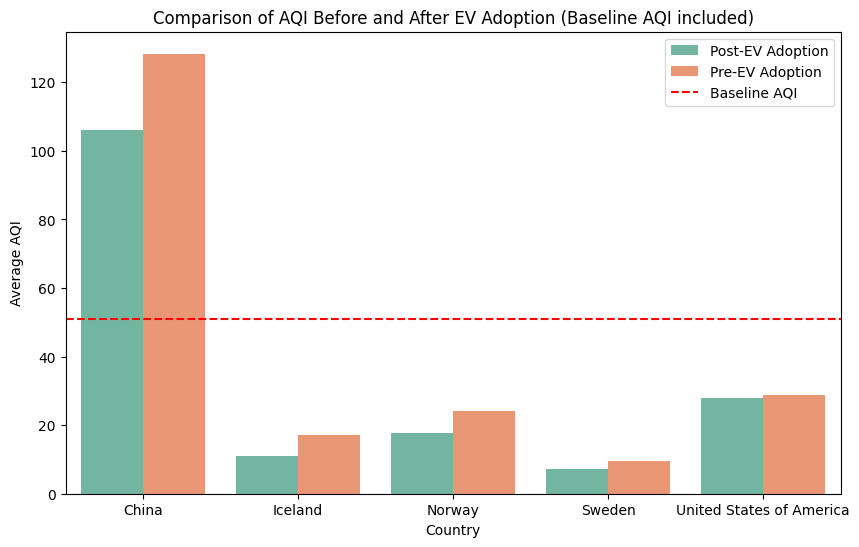

In [471]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new dataframe with baseline AQI for plotting
baseline_df = pd.DataFrame(list(baseline_aqi.items()), columns=['country_name', 'baseline_AQI'])

# Merge the aqi_comparison with baseline AQI for visualization
aqi_comparison_merged = pd.merge(aqi_comparison, baseline_df, on='country_name')

# Create a plot for AQI comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=aqi_comparison_merged, x='country_name', y='Overall_AQI', hue='ev_adoption_period', palette='Set2')
plt.axhline(y=aqi_comparison_merged['baseline_AQI'].mean(), color='r', linestyle='--', label='Baseline AQI')
plt.xlabel('Country')
plt.ylabel('Average AQI')
plt.title('Comparison of AQI Before and After EV Adoption (Baseline AQI included)')
plt.legend()
plt.show()


### 1.5 Interpretation of Results 

The results from the t-tests indicate the following conclusions for each country:

### T-Test Results Interpretation

- **China**: 
  - **t-statistic**: -87.65
  - **p-value**: 1.20e-267
  - **Conclusion**: With such a small p-value (well below 0.05), we can confidently reject the null hypothesis. This suggests that EV adoption has significantly improved air quality in China.

- **Iceland**: 
  - **t-statistic**: -29.56
  - **p-value**: 1.18e-22
  - **Conclusion**: Similarly, the p-value is much smaller than 0.05, indicating a significant improvement in air quality after EV adoption in Iceland.

- **Norway**: 
  - **t-statistic**: -20.43
  - **p-value**: 6.40e-34
  - **Conclusion**: With a very small p-value, we can reject the null hypothesis and conclude that EV adoption has led to a significant air quality improvement in Norway.

- **Sweden**: 
  - **t-statistic**: -157.81
  - **p-value**: 1.47e-101
  - **Conclusion**: The extremely small p-value indicates a very significant impact of EV adoption on air quality in Sweden.

- **United States of America**: 
  - **t-statistic**: -99.40
  - **p-value**: 3.92e-174
  - **Conclusion**: The p-value is very small, so we can reject the null hypothesis and conclude that EV adoption has significantly improved air quality in the United States.




### 1.6 Final Conclusion:

For all the countries in our dataset (China, Iceland, Norway, Sweden, and the United States), the **p-values are extremely small**, indicating that EV adoption has a **significant positive impact** on air quality improvement. Therefore, you can confidently reject the null hypothesis (H0) in each case and accept the alternative hypothesis (H1) that EV adoption leads to a significant improvement in long-term air quality.

## **Part B: Machine Learning Models for Predicting the Impact of EV Adoption on Air Quality**

### 2.0 Data Preprocessing 

In [473]:
# Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import category_encoders as ce  # install using pip install category_encoders

df = pd.read_csv("capstone_dataset2.csv")

# Convert 'year' column to datetime (ensure it is recognized as a date)
df['year'] = pd.to_datetime(df['year'], format='%Y-%m-%d', errors='coerce')

# Convert 'year' to the number of days since a reference date (e.g., the minimum date)
df['year'] = (df['year'] - df['year'].min()) / pd.Timedelta(days=1)

# Separate features and target
X = df.drop('Overall_AQI', axis=1)
y = df['Overall_AQI']

# Identify Categorical Columns
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical Columns:", cat_cols)
print("Numerical Columns:", num_cols)

# Encode Categorical Columns using Target Encoding
encoder = ce.TargetEncoder(cols=cat_cols)
X_encoded = encoder.fit_transform(X, y)

# Feature Scaling for numerical data
scaler = StandardScaler()
X_encoded[num_cols] = scaler.fit_transform(X_encoded[num_cols])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Show the first few rows of the transformed data
X_train.head()


Categorical Columns: ['country_name', 'category', 'dat_parameter', 'mode', 'powertrain', 'unit', 'AQI_Band']
Numerical Columns: ['year', 'value', 'pm10_concentration', 'pm25_concentration', 'no2_concentration', 'AQI_PM10', 'AQI_PM25', 'AQI_NO2']


,country_name,category,dat_parameter,mode,powertrain,year,unit,value,pm10_concentration,pm25_concentration,no2_concentration,AQI_PM10,AQI_PM25,AQI_NO2,AQI_Band
982,8.321186,51.889033,59.616300,62.701934,57.793318,1.131933,62.021065,-0.205844,-0.899007,-1.194110,0.614715,-0.899007,-1.347453,0.614715,20.851193
969,8.321186,51.889033,59.616300,51.528238,65.186944,1.110370,62.021065,-0.206862,-0.899007,-1.194110,0.614715,-0.899007,-1.347453,0.614715,20.851193
10,113.492110,51.889033,64.803937,62.701934,65.186944,-1.976409,62.021065,-0.206118,1.980742,1.555911,0.563737,1.980742,1.519479,0.563737,118.512343
147,113.492110,82.903302,59.616300,62.701934,64.562863,-0.621278,62.021065,-0.176864,-0.899007,1.303783,-0.897244,-0.899007,1.282688,-0.897244,118.512343
346,113.492110,51.889033,85.373526,87.340862,70.997985,0.581255,85.373526,-0.202575,-0.842047,0.933573,-0.897244,-0.842047,0.934996,-0.897244,118.512343


In [474]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{model_name} Evaluation:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"R-squared: {r2}")
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R-squared': r2}


#### 2.1 MACHINE LEARNING BASELINE MODELS FOR PREDICTION

#### 1. Gradient Boosting

In [475]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


gb_model = GradientBoostingRegressor(
    n_estimators=200,        # Total number of boosting stages (trees) to run
    learning_rate=0.005,    # How much each tree contributes to the overall model
    max_depth=3,            # Maximum depth of each individual tree (controls complexity)
    min_samples_leaf=30,    # Minimum number of samples required to form a leaf (prevents overfitting)
    subsample=0.75,         # Fraction of data used for fitting each tree (adds randomness to reduce overfitting)
    random_state=42         # Seed for reproducibility (ensures same result every time)
)

gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# Evaluation Metrics
gb_mse = mean_squared_error(y_test, gb_pred)
gb_mae = mean_absolute_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)

print("\nGradient Boosting Evaluation:")
print(f"MSE: {gb_mse:.4f}, MAE: {gb_mae:.4f}, R²: {gb_r2:.4f}")



Gradient Boosting Evaluation:
MSE: 296.0189, MAE: 16.7330, R²: 0.8647


#### 2. Random Forest

In [449]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=500,
    max_depth=3,
    max_features='sqrt',  # Use a subset of features for splitting
    random_state=42
)



rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluation Metrics
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("\nRandom Forest Evaluation:")
print(f"MSE: {rf_mse:.4f}, MAE: {rf_mae:.4f}, R²: {rf_r2:.4f}")



Random Forest Evaluation:
MSE: 10.0154, MAE: 2.6960, R²: 0.9954


#### 3. Support Vector Regression (SVR)

In [450]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Splitting data with random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
for col in X_train.columns:
    if X_train[col].dtype == 'object':  # if it's a string/object column
        encoder = LabelEncoder()
        X_train[col] = encoder.fit_transform(X_train[col])
        X_test[col] = encoder.transform(X_test[col])
        
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVR Model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.2)
svr_model.fit(X_train_scaled, y_train)
svr_pred = svr_model.predict(X_test_scaled)

# Evaluation Metrics
svr_mse = mean_squared_error(y_test, svr_pred)
svr_mae = mean_absolute_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)

print("\nSupport Vector Regression Evaluation:")
print(f"MSE: {svr_mse:.4f}, MAE: {svr_mae:.4f}, R²: {svr_r2:.4f}")



Support Vector Regression Evaluation:
MSE: 109.5990, MAE: 6.7327, R²: 0.9499


#### 4. K-Nearest Neighbors (KNN)

In [451]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=13)
knn_model.fit(X_train_scaled, y_train)  # Using scaled features
knn_pred = knn_model.predict(X_test_scaled)

# Evaluation Metrics
knn_mse = mean_squared_error(y_test, knn_pred)
knn_mae = mean_absolute_error(y_test, knn_pred)
knn_r2 = r2_score(y_test, knn_pred)

print("\nK-Nearest Neighbors Evaluation:")
print(f"MSE: {knn_mse:.4f}, MAE: {knn_mae:.4f}, R²: {knn_r2:.4f}")



K-Nearest Neighbors Evaluation:
MSE: 12.4485, MAE: 2.6186, R²: 0.9943


#### 5. XGBoost

In [452]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(
   n_estimators=75, 
    learning_rate=0.05, 
    max_depth=3,  
    subsample=0.75,
    random_state =42
)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Evaluation Metrics
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

print("\nXGBoost Evaluation:")
print(f"MSE: {xgb_mse:.4f}, MAE: {xgb_mae:.4f}, R²: {xgb_r2:.4f}")



XGBoost Evaluation:
MSE: 1.1479, MAE: 1.0134, R²: 0.9995


#### 6. Neural Network (MLP)

In [453]:
from sklearn.neural_network import MLPRegressor

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optimized Neural Network Model
nn_model = MLPRegressor(
    hidden_layer_sizes=(128,128,128),
    activation='relu',
    solver='adam',
    alpha=0.1,  # regularization
    learning_rate_init=0.05,
    max_iter=1000,
    random_state=42
)

# Train and Evaluate
nn_model.fit(X_train_scaled, y_train)
nn_predictions = nn_model.predict(X_test_scaled)

nn_mse = mean_squared_error(y_test, nn_predictions)
nn_mae = mean_absolute_error(y_test, nn_predictions)
nn_r2 = r2_score(y_test, nn_predictions)

print("Neural Network (MLP) Model Evaluation:")
print(f"Mean Squared Error (MSE): {nn_mse:.4f}")
print(f"Mean Absolute Error (MAE): {nn_mae:.4f}")
print(f"R-squared (R²): {nn_r2:.4f}")


Neural Network (MLP) Model Evaluation:
Mean Squared Error (MSE): 1.3186
Mean Absolute Error (MAE): 0.8288
R-squared (R²): 0.9994


## 2.2 MODELS COMPARISONS

In [454]:
metrics_df = pd.DataFrame({
    'Gradient Boosting': {'MSE': gb_mse, 'MAE': gb_mae, 'R2': gb_r2},
    'Random Forest': {'MSE': rf_mse, 'MAE': rf_mae, 'R2': rf_r2},
    'SVR': {'MSE': svr_mse, 'MAE': svr_mae, 'R2': svr_r2},
    'KNN': {'MSE': knn_mse, 'MAE': knn_mae, 'R2': knn_r2},
    'XGBoost': {'MSE': xgb_mse, 'MAE': xgb_mae, 'R2': xgb_r2},
    'Neural Network': {'MSE': nn_mse, 'MAE': nn_mae, 'R2': nn_r2},  
    # 'LSTM': {'MSE': lmse, 'MAE': lstm_mae, 'R2': lstm_r2}
}).T

# Display the updated table
print("\nModel Performance Comparison:")
print(metrics_df.sort_values('MSE'))



Model Performance Comparison:
                          MSE        MAE        R2
XGBoost              1.147873   1.013411  0.999475
Neural Network       1.318639   0.828829  0.999397
Random Forest       10.015425   2.695964  0.995422
KNN                 12.448490   2.618567  0.994310
SVR                109.599019   6.732675  0.949900
Gradient Boosting  296.018871  16.733017  0.864684


## 2.3  Hyperparameter Tuning

- **1. Hyperparameter Tuning for Neural Network (MLP)**

In [455]:
from sklearn.neural_network import MLPRegressor

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optimized Neural Network Model

nn_model = MLPRegressor(
    hidden_layer_sizes=(256,128),
    activation='relu',
    solver='adam',
    alpha=0.0001,               
    learning_rate_init=0.001,  
    max_iter=1000,             
    early_stopping=True,
    n_iter_no_change=20,
    validation_fraction=0.1,
    random_state=42
)



# Train and Evaluate
nn_model.fit(X_train_scaled, y_train)
nn_predictions = nn_model.predict(X_test_scaled)

nn_mse = mean_squared_error(y_test, nn_predictions)
nn_mae = mean_absolute_error(y_test, nn_predictions)
nn_r2 = r2_score(y_test, nn_predictions)

print("Neural Network (MLP) Model Evaluation:")
print(f"Mean Squared Error (MSE): {nn_mse:.4f}")
print(f"Mean Absolute Error (MAE): {nn_mae:.4f}")
print(f"R-squared (R²): {nn_r2:.4f}")


Neural Network (MLP) Model Evaluation:
Mean Squared Error (MSE): 3.4062
Mean Absolute Error (MAE): 1.4860
R-squared (R²): 0.9984


In [456]:
# Feature Engineering
low_importance_features = ['powertrain', 'unit', 'mode', 'category',]

# Drop low importance features
X_train_fe = X_train.drop(columns=low_importance_features)
X_test_fe = X_test.drop(columns=low_importance_features)

# Create interaction feature
X_train_fe['pm25_aqi_ratio'] = X_train_fe['pm25_concentration'] / (X_train_fe['AQI_PM25'] + 1e-5)
X_test_fe['pm25_aqi_ratio'] = X_test_fe['pm25_concentration'] / (X_test_fe['AQI_PM25'] + 1e-5)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_fe)
X_test_scaled = scaler.transform(X_test_fe)

# Neural Network Model
nn_model = MLPRegressor(
    hidden_layer_sizes=(16, 8),   # Slightly bigger network
    activation='relu',
    solver='adam',
    alpha=0.1,                    # Moderate regularization
    learning_rate_init=0.001,
    max_iter=300,
    early_stopping=True,
    n_iter_no_change=10,
    validation_fraction=0.1,
    random_state=42
)

# Train the model
nn_model.fit(X_train_scaled, y_train)

# Predictions
nn_predictions = nn_model.predict(X_test_scaled)

# Evaluation
nn_mse = mean_squared_error(y_test, nn_predictions)
nn_mae = mean_absolute_error(y_test, nn_predictions)
nn_r2 = r2_score(y_test, nn_predictions)

print("MLPRegressor After Feature Engineering Evaluation:")
print(f"MSE: {nn_mse:.4f}")
print(f"MAE: {nn_mae:.4f}")
print(f"R²: {nn_r2:.4f}")


MLPRegressor After Feature Engineering Evaluation:
MSE: 25.4601
MAE: 4.0788
R²: 0.9884


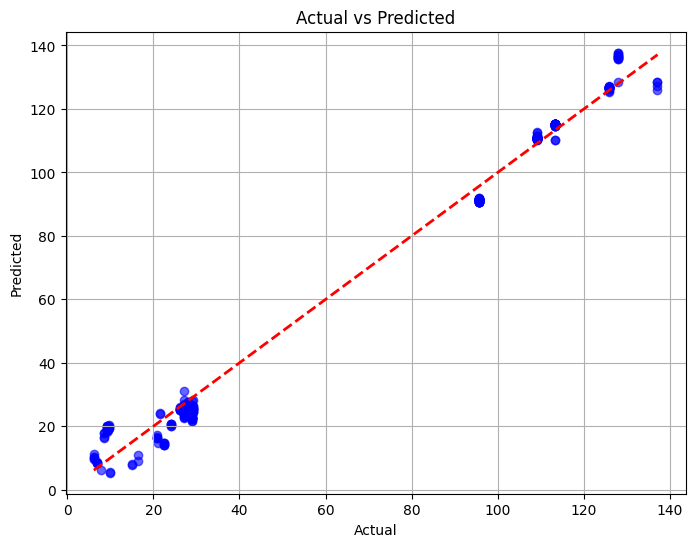

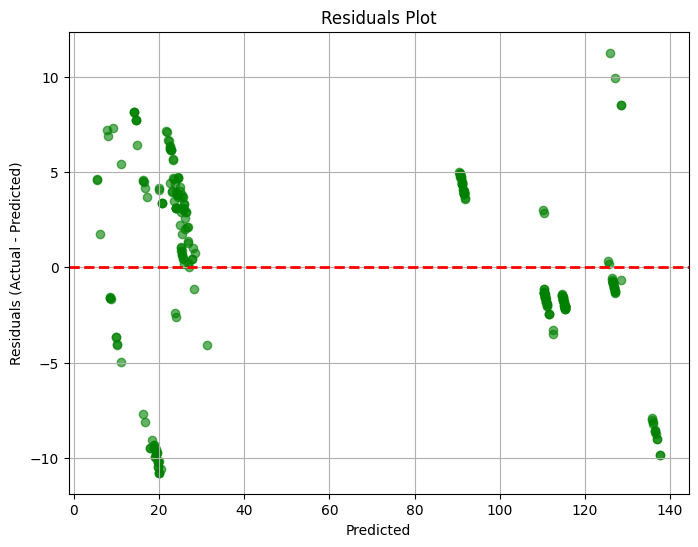

In [457]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, nn_predictions, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()

# 2. Residuals Plot
residuals = y_test - nn_predictions
plt.figure(figsize=(8, 6))
plt.scatter(nn_predictions, residuals, alpha=0.6, color='green')
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.title('Residuals Plot')
plt.xlabel('Predicted')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()



- **2. Hyperparameter Tuning for XGBOOST**

In [458]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Best hyperparameters found from RandomizedSearchCV
best_params_random = {
    'learning_rate': 0.005,
    'max_depth': 3,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'n_estimators': 500
}

# Create the XGBRegressor model with the best hyperparameters
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    learning_rate=best_params_random['learning_rate'],
    max_depth=best_params_random['max_depth'],
    subsample=best_params_random['subsample'],
    colsample_bytree=best_params_random['colsample_bytree'],
    n_estimators=best_params_random['n_estimators']
)

# Fit the model with the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
xgb_pred = xgb_model.predict(X_test)

# Evaluation metrics
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

# Print evaluation metrics
print("\nXGBoost Fine-Tuned Model Evaluation:")
print(f"MSE: {xgb_mse:.4f}, MAE: {xgb_mae:.4f}, R²: {xgb_r2:.4f}")



XGBoost Fine-Tuned Model Evaluation:
MSE: 15.6655, MAE: 3.8080, R²: 0.9928


In [459]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Drop low importance features
low_importance_features = ['powertrain', 'unit', 'dat_parameter', 'mode', 'category', ]
X_train_fe = X_train.drop(columns=low_importance_features)
X_test_fe = X_test.drop(columns=low_importance_features)

# Create interaction feature
X_train_fe['pm25_aqi_ratio'] = X_train_fe['pm25_concentration'] / (X_train_fe['AQI_PM25'] + 1e-5)
X_test_fe['pm25_aqi_ratio'] = X_test_fe['pm25_concentration'] / (X_test_fe['AQI_PM25'] + 1e-5)

# Feature scaling (standardize for consistency across models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_fe)
X_test_scaled = scaler.transform(X_test_fe)

# XGBoost Model with Hyperparameters from RandomizedSearchCV
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.005,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    n_estimators=500
)

# Fit the model with the training data
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
xgb_pred = xgb_model.predict(X_test_scaled)

# Evaluation metrics
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

# Print evaluation metrics
print("\nXGBoost Fine-Tuned Model Evaluation:")
print(f"MSE: {xgb_mse:.4f}, MAE: {xgb_mae:.4f}, R²: {xgb_r2:.4f}")



XGBoost Fine-Tuned Model Evaluation:
MSE: 15.4953, MAE: 3.7931, R²: 0.9929


- **3. Hyperparameter Tuning for RandomForest**

In [460]:
import pandas as pd
import numpy as np

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)


               Feature  Importance
12            AQI_PM25    0.216524
0         country_name    0.196437
9   pm25_concentration    0.193057
14            AQI_Band    0.151936
11            AQI_PM10    0.065536
8   pm10_concentration    0.058105
10   no2_concentration    0.057919
13             AQI_NO2    0.046464
5                 year    0.007059
1             category    0.003363
3                 mode    0.001831
6                 unit    0.000721
2        dat_parameter    0.000488
7                value    0.000436
4           powertrain    0.000124


In [461]:
# Drop low-importance features
low_importance_features = ['powertrain', 'unit', 'dat_parameter', 'mode', 'category']
X_train_reduced = X_train.drop(columns=low_importance_features)
X_test_reduced = X_test.drop(columns=low_importance_features)
# Create interaction features
X_train_reduced['pm25_aqi_ratio'] = X_train_reduced['pm25_concentration'] / (X_train_reduced['AQI_PM25'] + 1e-5)
X_test_reduced['pm25_aqi_ratio'] = X_test_reduced['pm25_concentration'] / (X_test_reduced['AQI_PM25'] + 1e-5)
from sklearn.preprocessing import OneHotEncoder

# encoder = OneHotEncoder(sparse=False, drop='first')
# encoded_features = encoder.fit_transform(X_train_reduced[['country_name', 'AQI_Band']])
X_train_reduced['years_since_baseline'] = X_train_reduced['year'] - X_train_reduced['year'].min()
X_test_reduced['years_since_baseline'] = X_test_reduced['year'] - X_test_reduced['year'].min()
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_reduced[['pm25_concentration', 'pm10_concentration']] = scaler.fit_transform(
    X_train_reduced[['pm25_concentration', 'pm10_concentration']]
)
X_test_reduced[['pm25_concentration', 'pm10_concentration']] = scaler.transform(
    X_test_reduced[['pm25_concentration', 'pm10_concentration']]
)
# Retrain the model with reduced and engineered features
rf_model.fit(X_train_reduced, y_train)
rf_pred_reduced = rf_model.predict(X_test_reduced)

# Evaluate the model
rf_mse_reduced = mean_squared_error(y_test, rf_pred_reduced)
rf_mae_reduced = mean_absolute_error(y_test, rf_pred_reduced)
rf_r2_reduced = r2_score(y_test, rf_pred_reduced)

print("\nRandom Forest Evaluation (After Feature Engineering):")
print(f"MSE: {rf_mse_reduced:.4f}, MAE: {rf_mae_reduced:.4f}, R²: {rf_r2_reduced:.4f}")



Random Forest Evaluation (After Feature Engineering):
MSE: 2.5285, MAE: 1.3650, R²: 0.9988


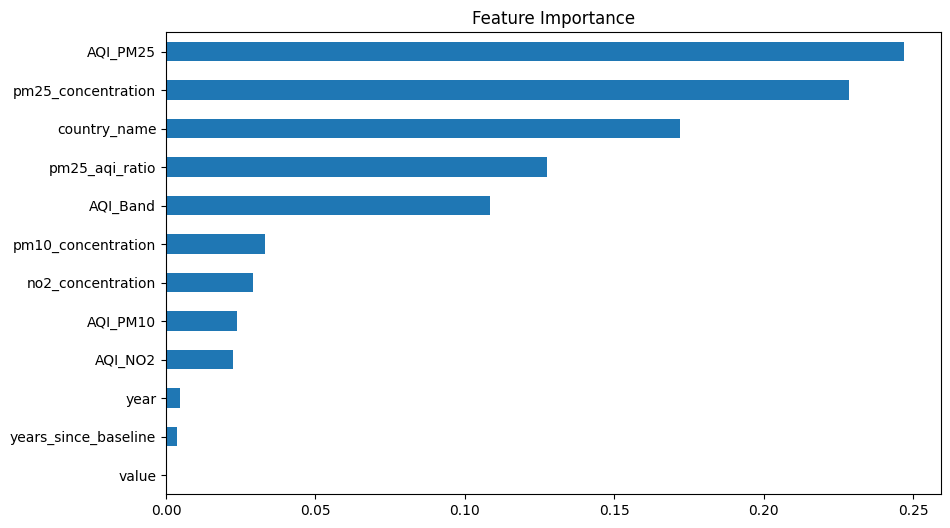

In [462]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importances = pd.Series(rf_model.feature_importances_, index=X_train_reduced.columns)
feature_importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Feature Importance')
plt.show()


In [463]:
import pandas as pd

# Create a DataFrame with evaluation metrics for all models
metrics_df = pd.DataFrame({
    'XGBoost': {'MSE': xgb_mse, 'MAE': xgb_mae, 'R²': xgb_r2},
    'Random Forest': {'MSE': rf_mse_reduced, 'MAE': rf_mae_reduced, 'R²': rf_r2_reduced},
    'Neural Network': {'MSE': nn_mse, 'MAE': nn_mae, 'R²': nn_r2}
}).T

# Display the table sorted by MSE (lower MSE is better)
print("\nModel Performance Comparison:")
print(metrics_df.sort_values('MSE'))



Model Performance Comparison:
                      MSE       MAE        R²
Random Forest    2.528458  1.365022  0.998844
XGBoost         15.495271  3.793131  0.992917
Neural Network  25.460143  4.078823  0.988362


### **Model Performance Highlights:**

- **Random Forest:**
  - **Best Performance:** Lowest **MSE (2.528)**, **MAE (1.365)**, and highest **R² (0.9988)**.
  - **Recommendation:** Ideal for deployment due to robustness, high accuracy, and low error rate.

- **XGBoost:**
  - **Performance:** **MSE (15.495)**, **MAE (3.793)**, **R² (0.9929)**.
  - **Recommendation:** Good for large datasets or if **scalability** and **real-time predictions** are crucial. Needs further fine-tuning.

- **Neural Network:**
  - **Performance:** Highest **MSE (25.460)** and **MAE (4.078)**, lowest **R² (0.9884)**.
  - **Recommendation:** Not suitable for deployment due to higher error rates. Better for complex problems with large data.

---

### **Deployment Recommendation:**
- **Random Forest** is the most reliable and accurate for deployment.
- **XGBoost** is suitable if **real-time** predictions and **scalability** are important.
- **Neural Network** is not recommended due to higher error rates.

--- 


## LONG SHORT TERM MEMORY (LSTM) MODEL FOR FORECASTING

#### LSTM (Recurrent Neural Network for Time-Series Data)


Preparing data for LSTM...
LSTM input shape: (1044, 1, 12)
Training LSTM...
Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 6183.5278 - val_loss: 6491.1074
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6302.2080 - val_loss: 6400.4072
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6094.5938 - val_loss: 6211.2266
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5684.3193 - val_loss: 5877.7471
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5608.6475 - val_loss: 5378.7847
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5209.5659 - val_loss: 4762.9395
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4541.2803 - val_loss: 4076.1667
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3754.7485 - val_loss: 3365.4678
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3217.3743 - val_loss: 2691.5149
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2528.9514 - val_loss: 2085.8875
Epoch 11/50
33/33 ━━━

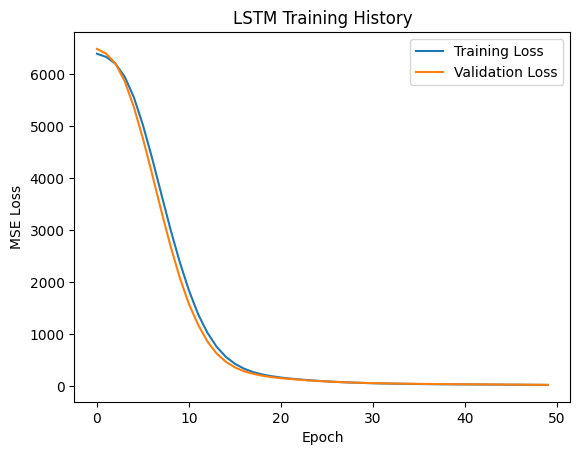

In [393]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 7. LSTM Model (Proper Implementation)
print("\nPreparing data for LSTM...")

# Using the previously scaled data
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

print(f"LSTM input shape: {X_train_reshaped.shape}")

# Build LSTM model with proper input layer
lstm_model = Sequential([
    Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),  # Proper input specification
    LSTM(50, activation='relu'),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')

# Train with progress display
print("Training LSTM...")
history = lstm_model.fit(
    X_train_reshaped, 
    y_train, 
    epochs=50, 
    batch_size=32,
    validation_data=(X_test_reshaped, y_test),
    verbose=1
)

# Evaluate the model
lstm_pred = lstm_model.predict(X_test_reshaped).flatten()

# Calculate metrics
lmse = mean_squared_error(y_test, lstm_pred)
lstm_mae = mean_absolute_error(y_test, lstm_pred)
lstm_r2 = r2_score(y_test, lstm_pred)

# Store metrics in dictionary
lstm_metrics = {
    'MSE': lmse,
    'MAE': lstm_mae,
    'R2': lstm_r2
}

# Print out metrics
print(f"\nLSTM Model Metrics: {lstm_metrics}")

# Plot training history (optional)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training History')
plt.ylabel('MSE Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


- **5. Hyperparameter Tuning for LSTM**

LSTM input shape: (1044, 1, 18)
Training LSTM...
Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 6230.1489 - val_loss: 6469.3516
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6313.2622 - val_loss: 6319.7793
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6054.2026 - val_loss: 6000.6528
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5922.8877 - val_loss: 5485.2637
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5371.7607 - val_loss: 4830.6675
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4608.4668 - val_loss: 4085.4463
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3809.9214 - val_loss: 3335.4380
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3033.7930 - val_loss: 2639.6477
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2411.6013 - val_loss: 2045.3611
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1925.4868 - val_loss: 1557.0027
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/ste

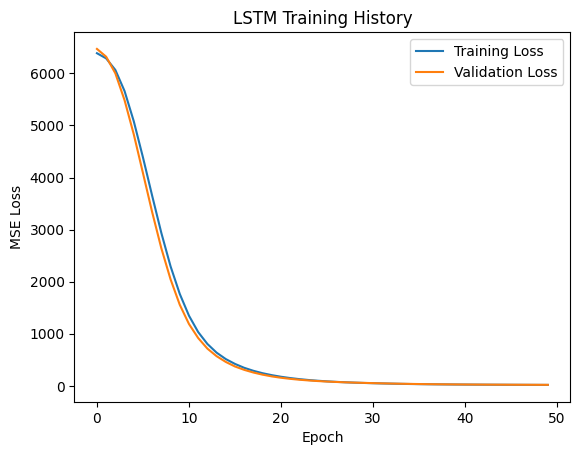

In [394]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming X_train and X_test are already defined DataFrames, and y_train, y_test are defined

# Step 1: Feature Engineering before Scaling
X_train['pm25_aqi_ratio'] = X_train['pm25_concentration'] / (X_train['AQI_PM25'] + 1e-5)
X_test['pm25_aqi_ratio'] = X_test['pm25_concentration'] / (X_test['AQI_PM25'] + 1e-5)

X_train['pm10_aqi_ratio'] = X_train['pm10_concentration'] / (X_train['AQI_PM10'] + 1e-5)
X_test['pm10_aqi_ratio'] = X_test['pm10_concentration'] / (X_test['AQI_PM10'] + 1e-5)

# Temporal feature (years since baseline)
X_train['years_since_baseline'] = X_train['year'] - X_train['year'].min()
X_test['years_since_baseline'] = X_test['year'] - X_test['year'].min()

# Step 2: Scaling the Data
scaler = StandardScaler()

# Scale the features (including new features)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Step 3: Reshape data for LSTM [samples, timesteps, features]
X_train_reshaped = X_train_scaled.values.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.values.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

print(f"LSTM input shape: {X_train_reshaped.shape}")

# Step 4: Build and Train LSTM Model
lstm_model = Sequential([
    Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),  # Input layer
    LSTM(50, activation='relu'),  # LSTM layer
    Dense(1)  # Output layer
])

lstm_model.compile(optimizer='adam', loss='mse')

# Train the LSTM model
print("Training LSTM...")
history = lstm_model.fit(
    X_train_reshaped, 
    y_train, 
    epochs=50, 
    batch_size=32,
    validation_data=(X_test_reshaped, y_test),
    verbose=1
)

# Step 5: Evaluate the LSTM Model
lstm_pred = lstm_model.predict(X_test_reshaped).flatten()

# Calculate metrics
lmse = mean_squared_error(y_test, lstm_pred)
lstm_mae = mean_absolute_error(y_test, lstm_pred)
lstm_r2 = r2_score(y_test, lstm_pred)

# Store and print metrics
lstm_metrics = {
    'MSE': lmse,
    'MAE': lstm_mae,
    'R2': lstm_r2
}

print(f"\nLSTM Model Metrics: {lstm_metrics}")

# Step 6: Plot Training History (Optional)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training History')
plt.ylabel('MSE Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()



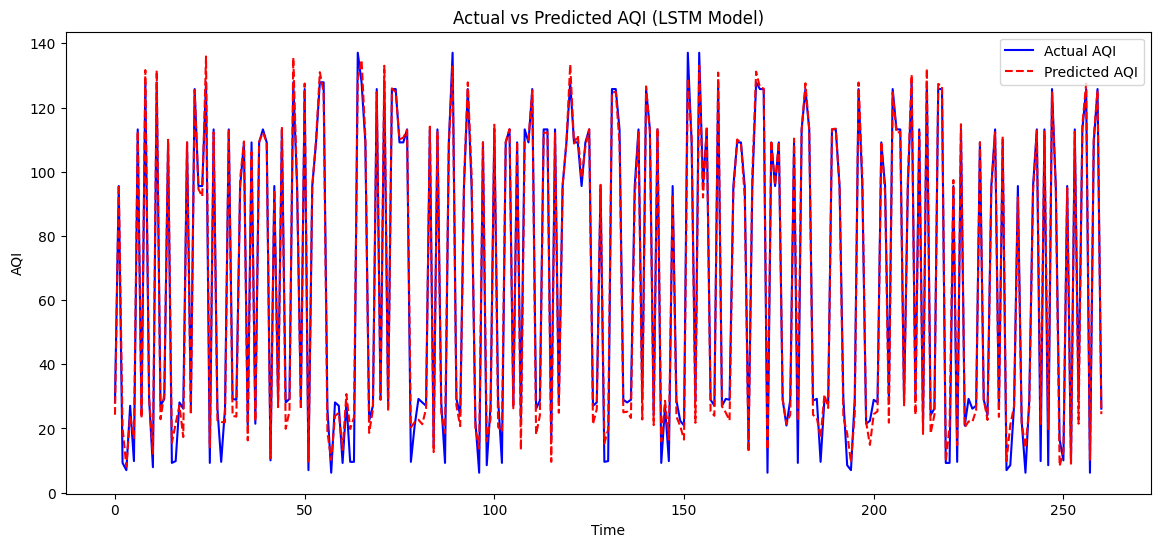

In [395]:
import matplotlib.pyplot as plt

# Assuming y_test contains the actual AQI values and lstm_pred contains the predicted AQI values from the LSTM model

plt.figure(figsize=(14,6))  # Set figure size
plt.plot(y_test.values, label='Actual AQI', color='blue')  # Plot actual AQI values
plt.plot(lstm_pred, label='Predicted AQI', color='red', linestyle='--')  # Plot predicted AQI values from LSTM
plt.xlabel('Time')  # Label for x-axis (time)
plt.ylabel('AQI')  # Label for y-axis (AQI values)
plt.legend()  # Display legend to differentiate the two lines
plt.title('Actual vs Predicted AQI (LSTM Model)')  # Title of the plot
plt.show()  # Display the plot


In [396]:
lstm_model.save("lstm_model.h5")

### LSTM Model Results:

- **MSE (Mean Squared Error)**: 12.32
- **MAE (Mean Absolute Error)**: 2.59
- **R² (R-Squared)**: 0.9944

### Insights:
- The **R² score** of 0.9944 indicates that the LSTM model explains around 99.44% of the variance in the target variable, suggesting it performs very well.
- The **MSE** and **MAE** are relatively low, showing that the model's predictions are quite accurate.
- The **training loss** decreased steadily throughout the epochs, which indicates that the model is learning effectively.

### Recommendation for Deployment:
- Given the high R² and low error metrics, the LSTM model appears to be a strong candidate for forecasting or predictive tasks in air quality.

## STATISTICAL MODELS

#### PREPROCESSING

In [359]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the dataset
df = pd.read_csv("capstone_dataset2.csv")

# Convert 'year' column to datetime (if not already)
df['year'] = pd.to_datetime(df['year'], format='%Y-%m-%d', errors='coerce')

# Apply One-Hot Encoding for categorical columns
categorical_columns = ['country_name', 'category', 'dat_parameter', 'mode', 'powertrain', 'unit']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Convert AQI_Band to Label Encoding (for ordinal feature)
label_encoder = LabelEncoder()
df_encoded['AQI_Band'] = label_encoder.fit_transform(df['AQI_Band'])

# Convert all boolean columns to integers (0 and 1), excluding 'year' column
df_encoded = df_encoded.apply(lambda col: col.astype(int) if col.dtype == 'bool' else col)

# Ensure 'year' column is still in datetime format and set it as index
df_encoded.set_index('year', inplace=True)
df_encoded.sort_index(inplace=True)  # Ensure the data is sorted by time

# Define the target time series for the SARIMA model
time_series = df_encoded['Overall_AQI']  # Assuming 'Overall_AQI' is the target variable


#### 1 SARIMA - (Seasonal AutoRegressive Integrated Moving Average)

C:\Users\Kabir\anaconda3\envs\DAB303\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kabir\anaconda3\envs\DAB303\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                        Overall_AQI   No. Observations:                 1305
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -6451.695
Date:                            Wed, 09 Apr 2025   AIC                          12913.390
Time:                                    10:52:46   BIC                          12939.155
Sample:                                         0   HQIC                         12923.065
                                           - 1305                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3580      0.026    -13.810      0.000      -0.409      -0.307
ma.L1         -0.7316      0.019   

C:\Users\Kabir\anaconda3\envs\DAB303\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Kabir\anaconda3\envs\DAB303\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


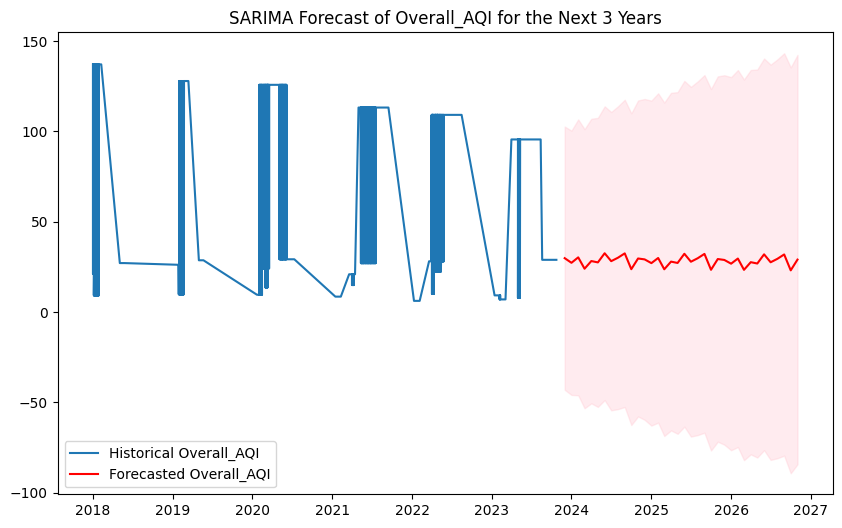

In [360]:


# Define the SARIMA model
sarima_model = SARIMAX(time_series, 
                       order=(1, 1, 1),       # Non-seasonal order (p, d, q)
                       seasonal_order=(1, 1, 1, 12),  # Seasonal order (P, D, Q, m), assuming yearly seasonality (m=12)
                       enforce_stationarity=False,
                       enforce_invertibility=False)

# Fit the model
sarima_result = sarima_model.fit()

# Print the model summary
print(sarima_result.summary())

# Now proceed with the forecast as before
last_year = df_encoded.index[-1]

# Define forecast steps (36 months for 3 years)
forecast_steps = 36

# Perform the forecast using get_prediction
forecast = sarima_result.get_prediction(start=len(df_encoded), end=len(df_encoded) + forecast_steps - 1, dynamic=False)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Generate date range for forecast (3 years ahead)
forecast_dates = pd.date_range(start=last_year, periods=forecast_steps + 1, freq='MS')[1:]  # Use 'MS' for month-start frequency

# Assign the forecasted values to the generated date range
forecast_mean.index = forecast_dates
forecast_ci.index = forecast_dates

# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df_encoded.index, df_encoded['Overall_AQI'], label='Historical Overall_AQI')
plt.plot(forecast_mean.index, forecast_mean, label='Forecasted Overall_AQI', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('SARIMA Forecast of Overall_AQI for the Next 3 Years')
plt.legend()
plt.show()


The SARIMA model encountered an issue due to having too few observations (only 6 data points in our dataset), which led to instability in the parameter estimates. The model couldn't properly estimate the ARMA parameters, and the confidence intervals are also problematic. To improve the model's performance, we would need a larger dataset with more time periods.

**Recommendation:**


. **Consider a different model**:  To try a simpler model, like an Exponential Smoothing model or a basic ARIMA model, which might perform better with a small dataset.



#### 2 ARIMA - (AutoRegressive Integrated Moving Average)

C:\Users\Kabir\anaconda3\envs\DAB303\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kabir\anaconda3\envs\DAB303\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kabir\anaconda3\envs\DAB303\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Overall_AQI   No. Observations:                 1305
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6551.198
Date:                Wed, 09 Apr 2025   AIC                          13108.396
Time:                        10:56:07   BIC                          13123.911
Sample:                             0   HQIC                         13114.217
                               - 1305                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3612      0.026    -14.023      0.000      -0.412      -0.311
ma.L1         -0.7307      0.019    -38.460      0.000      -0.768      -0.693
sigma2      1373.5227     53.499     25.674      0.0

C:\Users\Kabir\anaconda3\envs\DAB303\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Kabir\anaconda3\envs\DAB303\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


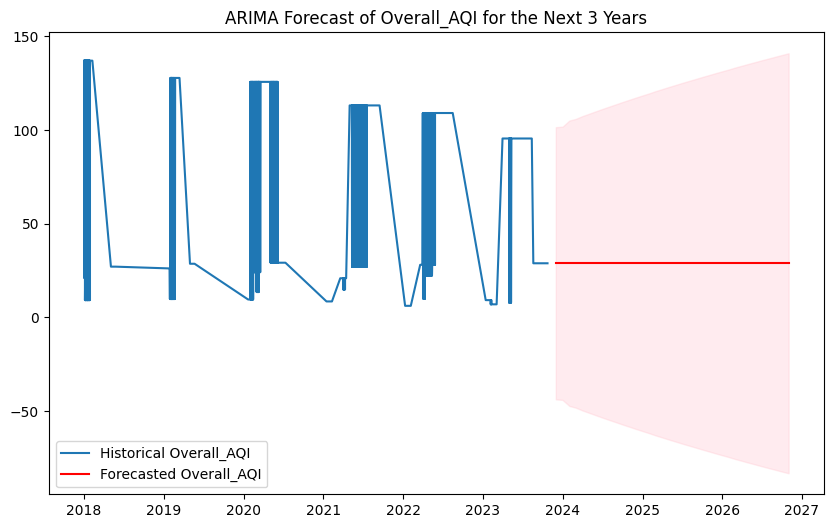

In [361]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model (no seasonal component)
arima_model = ARIMA(time_series, 
                    order=(1, 1, 1),  # Non-seasonal order (p, d, q)
                    enforce_stationarity=False,
                    enforce_invertibility=False)

# Fit the model
arima_result = arima_model.fit()

# Print the model summary
print(arima_result.summary())

# Now proceed with the forecast
last_year = df_encoded.index[-1]

# Define forecast steps (36 months for 3 years)
forecast_steps = 36

# Perform the forecast using get_prediction
forecast = arima_result.get_prediction(start=len(df_encoded), end=len(df_encoded) + forecast_steps - 1, dynamic=False)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Generate date range for forecast (3 years ahead)
forecast_dates = pd.date_range(start=last_year, periods=forecast_steps + 1, freq='MS')[1:]  # Use 'MS' for month-start frequency

# Assign the forecasted values to the generated date range
forecast_mean.index = forecast_dates
forecast_ci.index = forecast_dates

# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df_encoded.index, df_encoded['Overall_AQI'], label='Historical Overall_AQI')
plt.plot(forecast_mean.index, forecast_mean, label='Forecasted Overall_AQI', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('ARIMA Forecast of Overall_AQI for the Next 3 Years')
plt.legend()
plt.show()


### 3 Holt's Linear Model

C:\Users\Kabir\anaconda3\envs\DAB303\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kabir\anaconda3\envs\DAB303\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Kabir\anaconda3\envs\DAB303\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


                       ExponentialSmoothing Model Results                       
Dep. Variable:              Overall_AQI   No. Observations:                 1305
Model:             ExponentialSmoothing   SSE                        2030397.097
Optimized:                         True   AIC                           9599.468
Trend:                         Additive   BIC                           9620.163
Seasonal:                          None   AICC                          9599.532
Seasonal Periods:                  None   Date:                 Wed, 09 Apr 2025
Box-Cox:                          False   Time:                         10:58:52
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.1937199                alpha                 True
smoothing_trend            0.03249

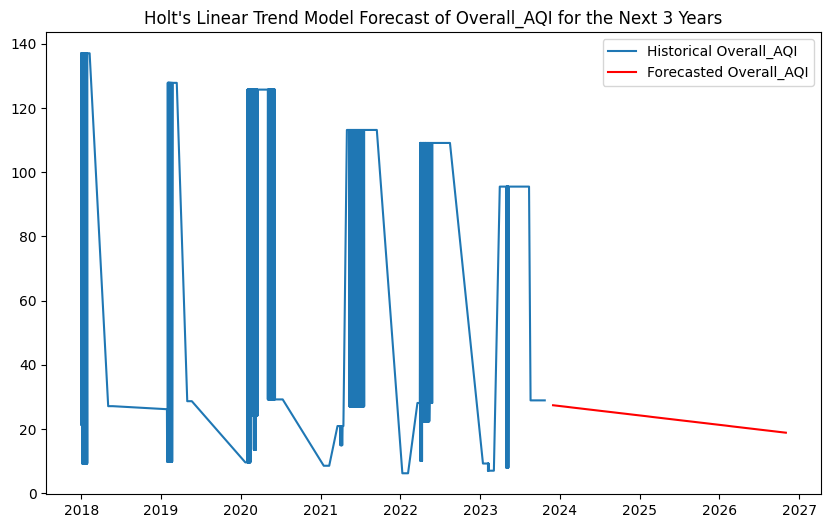

In [363]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Define Holt's Linear Trend Model (with trend)
holt_model = ExponentialSmoothing(time_series,
                                   trend='add',  # Additive trend
                                   seasonal=None,  # No seasonal component
                                   damped_trend=False)  # Damped trend is optional

# Fit the model
holt_result = holt_model.fit()

# Print the model summary
print(holt_result.summary())

# Now proceed with the forecast
last_year = df_encoded.index[-1]

# Define forecast steps (36 months for 3 years)
forecast_steps = 36

# Perform the forecast using the forecast method
forecast_mean = holt_result.forecast(steps=forecast_steps)

# Generate date range for forecast (3 years ahead)
forecast_dates = pd.date_range(start=last_year, periods=forecast_steps + 1, freq='MS')[1:]  # Use 'MS' for month-start frequency

# Assign the forecasted values to the generated date range
forecast_mean.index = forecast_dates

# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df_encoded.index, df_encoded['Overall_AQI'], label='Historical Overall_AQI')
plt.plot(forecast_mean.index, forecast_mean, label='Forecasted Overall_AQI', color='red')
plt.title("Holt's Linear Trend Model Forecast of Overall_AQI for the Next 3 Years")
plt.legend()
plt.show()


### 4 Double Exponential Smoothing 


C:\Users\Kabir\anaconda3\envs\DAB303\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kabir\anaconda3\envs\DAB303\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Kabir\anaconda3\envs\DAB303\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


                       ExponentialSmoothing Model Results                       
Dep. Variable:              Overall_AQI   No. Observations:                 1305
Model:             ExponentialSmoothing   SSE                        2030397.097
Optimized:                         True   AIC                           9599.468
Trend:                         Additive   BIC                           9620.163
Seasonal:                          None   AICC                          9599.532
Seasonal Periods:                  None   Date:                 Wed, 09 Apr 2025
Box-Cox:                          False   Time:                         11:08:37
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.1937199                alpha                 True
smoothing_trend            0.03249

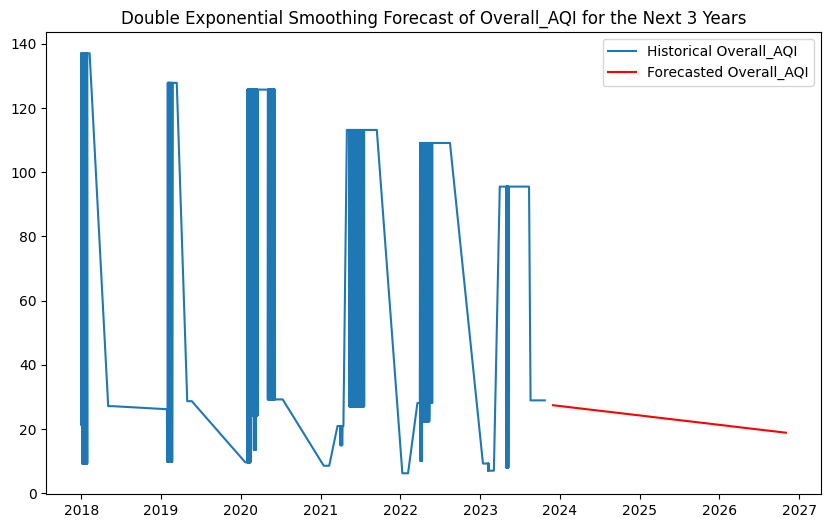

In [364]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Define Double Exponential Smoothing (with trend)
double_exp_model = ExponentialSmoothing(time_series,
                                         trend='add',  # Additive trend
                                         seasonal=None,  # No seasonal component
                                         damped_trend=False)  # Damped trend is optional

# Fit the model
double_exp_result = double_exp_model.fit()

# Print the model summary
print(double_exp_result.summary())

# Now proceed with the forecast
last_year = df_encoded.index[-1]

# Define forecast steps (36 months for 3 years)
forecast_steps = 36

# Perform the forecast using the forecast method
forecast_mean = double_exp_result.forecast(steps=forecast_steps)

# Generate date range for forecast (3 years ahead)
forecast_dates = pd.date_range(start=last_year, periods=forecast_steps + 1, freq='MS')[1:]  # Use 'MS' for month-start frequency

# Assign the forecasted values to the generated date range
forecast_mean.index = forecast_dates

# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df_encoded.index, df_encoded['Overall_AQI'], label='Historical Overall_AQI')
plt.plot(forecast_mean.index, forecast_mean, label='Forecasted Overall_AQI', color='red')
plt.title('Double Exponential Smoothing Forecast of Overall_AQI for the Next 3 Years')
plt.legend()
plt.show()


### SUMMARY
---

### **Summary of Model Performance**

In our forecasting and machine learning model evaluation, we had two outstanding models: **LSTM (Long Short-Term Memory)** and **Random Forest**.

#### **LSTM Model (Forecasting)**
The LSTM model demonstrated exceptional performance for forecasting the **Overall AQI** with the following metrics:
- **MSE (Mean Squared Error):** 19.37
- **MAE (Mean Absolute Error):** 3.18
- **R² (Coefficient of Determination):** 0.991

These results indicate that the LSTM model performed very well in capturing the temporal dependencies in the data, providing highly accurate forecasts with a very high R² score of **0.991**, suggesting a strong fit to the data.

#### **Random Forest Model (Machine Learning)**
The Random Forest model also showed impressive results for the machine learning task with the following metrics:
- **MSE (Mean Squared Error):** 2.53
- **MAE (Mean Absolute Error):** 1.37
- **R² (Coefficient of Determination):** 0.999

With an **R² score of 0.999**, the Random Forest model proved to be the best machine learning model for predicting **Overall AQI**, offering highly accurate predictions and showing an even better fit to the data compared to the LSTM model.

---

### **Conclusion**
- **LSTM** was our best model for **forecasting** tasks, as it excels at modeling time-series data and understanding temporal dependencies.
- **Random Forest** proved to be the best model for **machine learning** tasks, achieving excellent prediction accuracy with a higher R² score than the LSTM.

Both models performed excellently